<a href="https://colab.research.google.com/github/KARTHIK-M116/Coke-Fanta-Sprite-Pepsi-Object-detection/blob/main/MachineLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.2/235.7 GB disk)


In [3]:
!pip uninstall -y urllib3 requests requests-toolbelt roboflow
!pip install --upgrade urllib3 requests requests-toolbelt roboflow


Found existing installation: urllib3 2.3.0
Uninstalling urllib3-2.3.0:
  Successfully uninstalled urllib3-2.3.0
Found existing installation: requests 2.32.3
Uninstalling requests-2.32.3:
  Successfully uninstalled requests-2.32.3
Found existing installation: requests-toolbelt 1.0.0
Uninstalling requests-toolbelt-1.0.0:
  Successfully uninstalled requests-toolbelt-1.0.0
Found existing installation: roboflow 1.1.58
Uninstalling roboflow-1.1.58:
  Successfully uninstalled roboflow-1.1.58
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached roboflow-1.1.58-py3-none-any.whl.metadata (9.7 kB)
Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
Using cached roboflow-1.1.58-py3-none-any.whl (84 kB)


In [1]:
pip install --upgrade urllib3==2.0.7


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1p60I7bnvMmuEK6l6fTZ")
project = rf.workspace("hawkeg").project("smallmodel2")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SmallModel2-2 in yolov11:: 100%|██████████| 1910/1910 [00:00<00:00, 9458.34it/s]


In [3]:
dataset.location

'/content/SmallModel2-2'

In [4]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640 batch=8 patience=10 augment=True lr0=0.01


100% 5.35M/5.35M [00:00<00:00, 15.6MB/s]
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/SmallModel2-2/data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

In [7]:
!yolo task=detect mode=val_model="/content/runs/detect/train/weights/best.pt" data = {dataset.location}/data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 920, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=val_model=/content/runs/detect/train/weights/best.pt'. Valid modes are frozenset({'train', 'benchmark', 'track', 'val', 'export', 'predict'}).

    Arguments received: ['yolo', 'task=detect', 'mode=val_model=/content/runs/detect/train/weights/best.pt', 'data', '=', '/content/SmallModel2-2/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'pose', 'classify', 'obb', 'detect', 'segment'})
                MODE (required) is one of frozenset({'train', 'benchmark', 'track', 'val', 'export', 'predict'})
                ARGS (optional) are any num

In [8]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data=/content/SmallModel2-2/data.yaml batch=1 imgsz=640


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,662 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/SmallModel2-2/valid/labels.cache... 79 images, 0 backgrounds, 0 corrupt: 100% 79/79 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 107. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 79/79 [00:01<00:00, 58.16it/s]
                   all         79        107      0.877      0.786      0.898      0.684
       CocaCola-Bottle          4          4      0.989          1      0.995      0.821
          CocaCola-Can          4          4      0.904          1      0.995      0.888
     CocaCola-Logo-New          3          5    

In [11]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf = 0.25 source=/content/SmallModel2-2/test/images save = True


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,662 parameters, 0 gradients, 6.3 GFLOPs

image 1/39 /content/SmallModel2-2/test/images/-23_jpg.rf.7be1dafff5bf2026dc79a2dc32b9fff6.jpg: 640x640 1 Fanta-Can, 1 Fanta-Logo-Blue, 1 Sprite-Can-Old, 1 Sprite-Logo-Old, 10.9ms
image 2/39 /content/SmallModel2-2/test/images/-52_jpg.rf.05b83e6a00fd8cbdd9e82906d8f0af8b.jpg: 640x640 1 CocaCola-Can, 1 Fanta-Logo-White, 8.8ms
image 3/39 /content/SmallModel2-2/test/images/000002_jpg.rf.eed95f869f7f7788ef11e03bf2547748.jpg: 640x640 2 CocaCola-Logo-News, 8.8ms
image 4/39 /content/SmallModel2-2/test/images/000116_jpg.rf.8fae7db20a56374703b74ba360fb3013.jpg: 640x640 1 CocaCola-Bottle, 1 CocaCola-Logo-New, 8.1ms
image 5/39 /content/SmallModel2-2/test/images/2022-10-16-170936_jpg.rf.db44e5e183f1b5bcfe6f67d9fc82237a.jpg: 640x640 1 CocaCola-Bottle, 8.0ms
image 6/39 /content/SmallModel2-2/test/images/20240206_161113_jpg.rf.8e4ac31e97e0d

In [28]:
import glob
import os
!pip install IPython
import IPython
from IPython.display import Image, display
latest_folder = max(glob.glob('/content/runs/detect/predict3*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width = 600))
  print("\n")

NameError: name 'IPyImage' is not defined

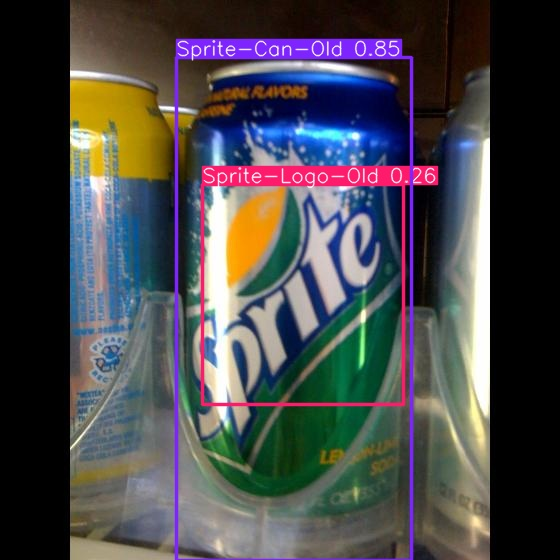

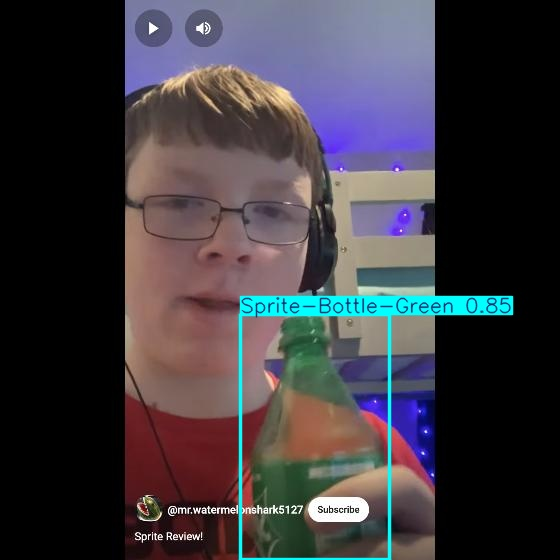

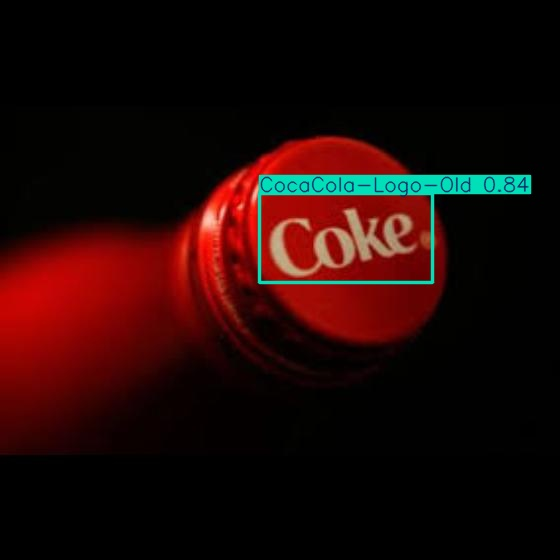

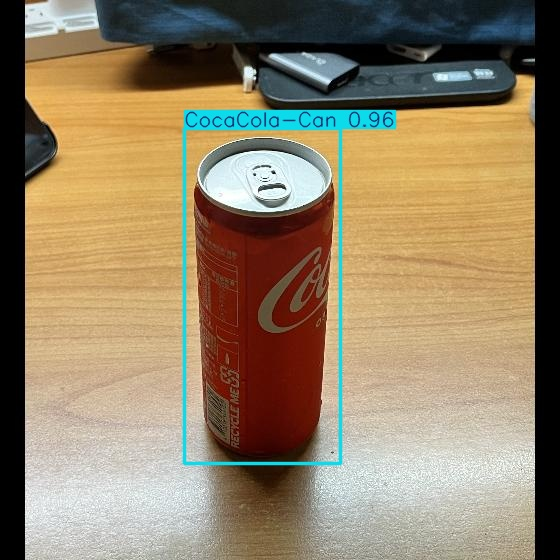

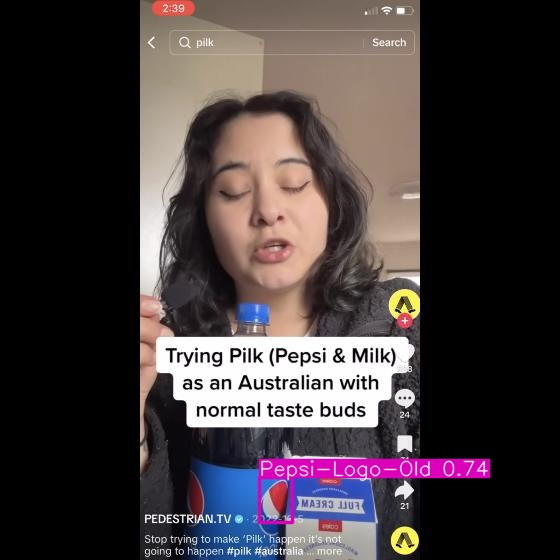

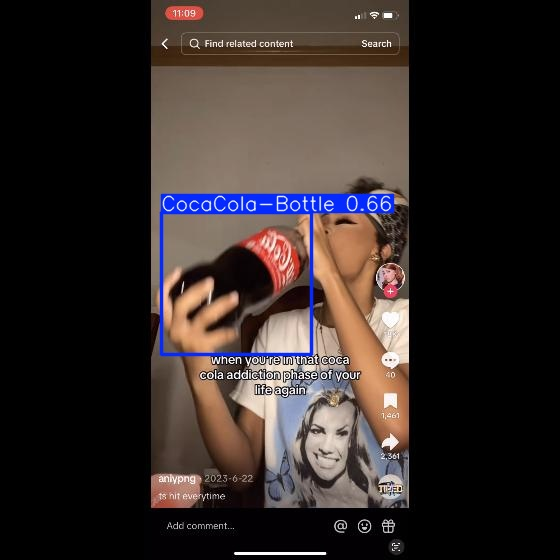

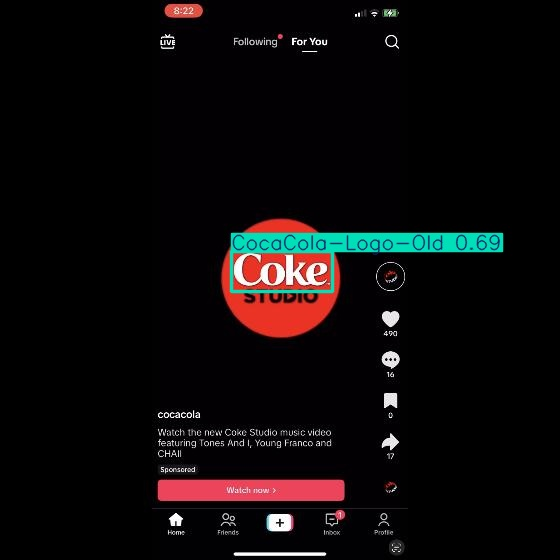

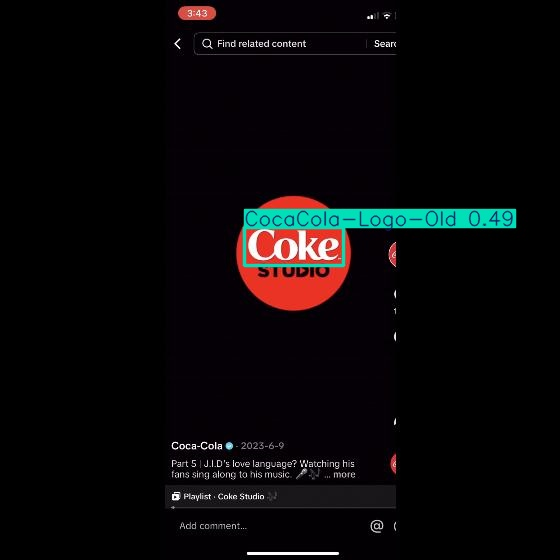

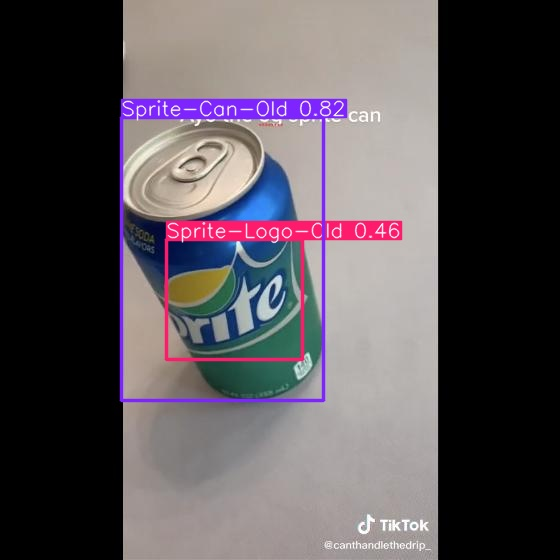

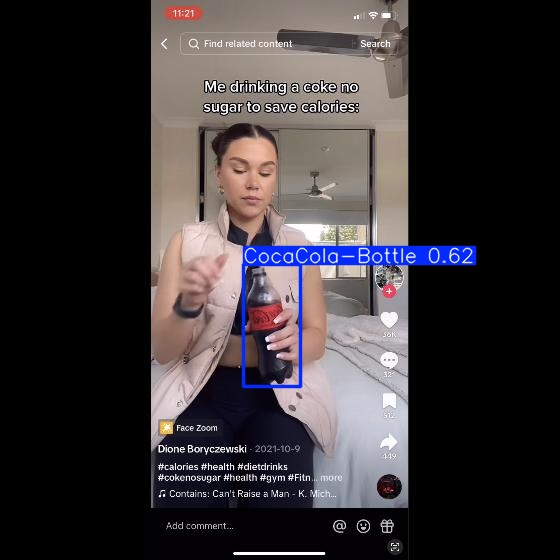

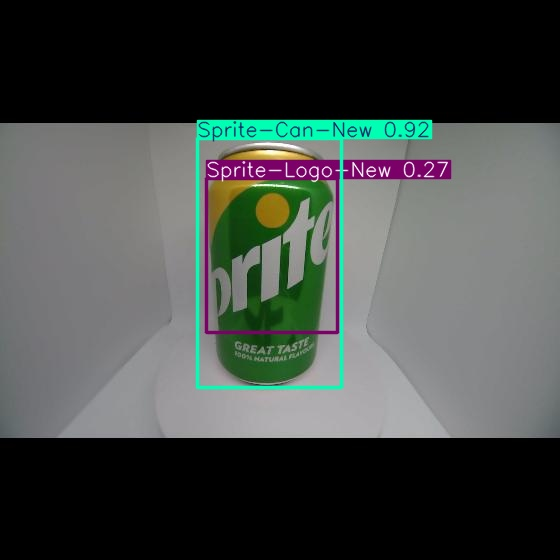

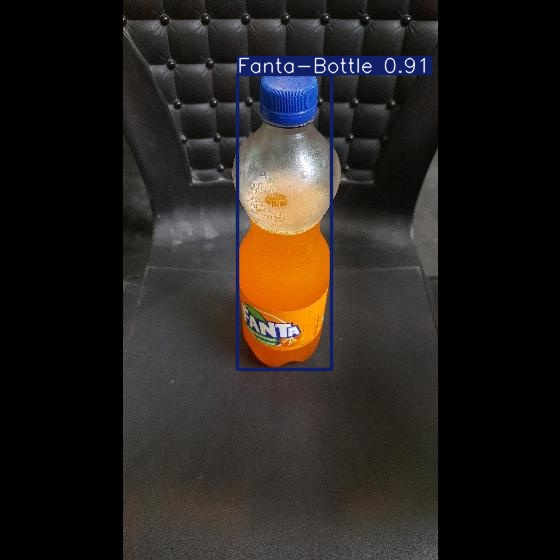

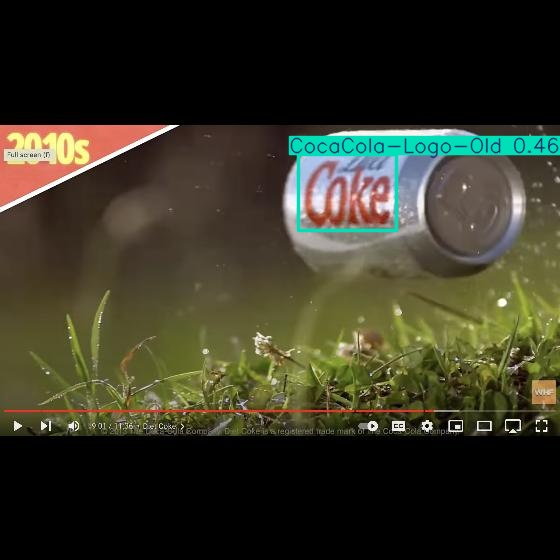

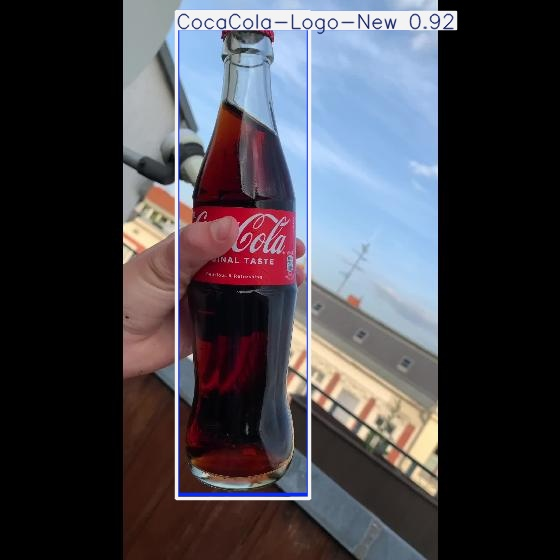

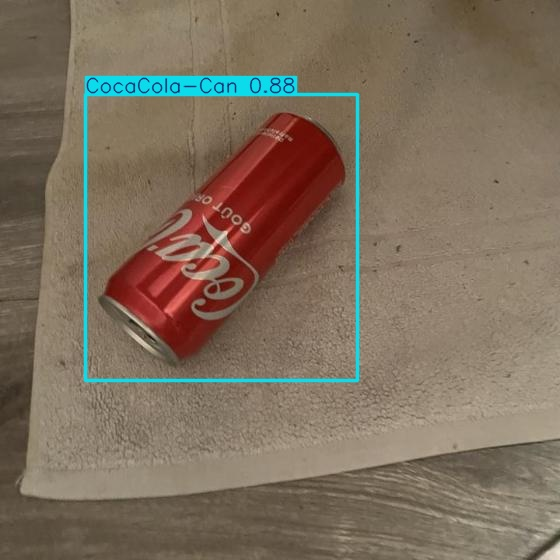

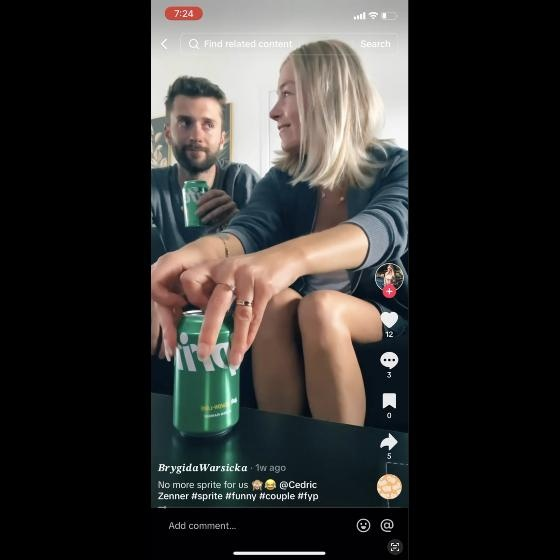

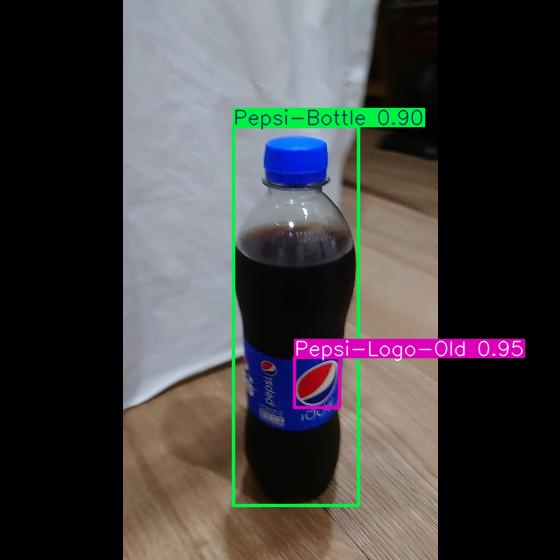

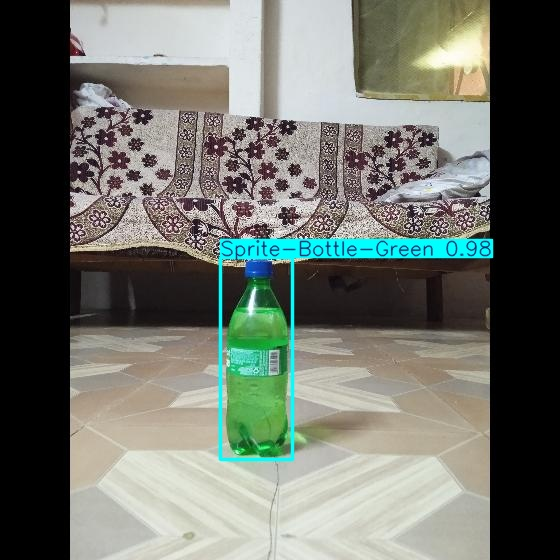

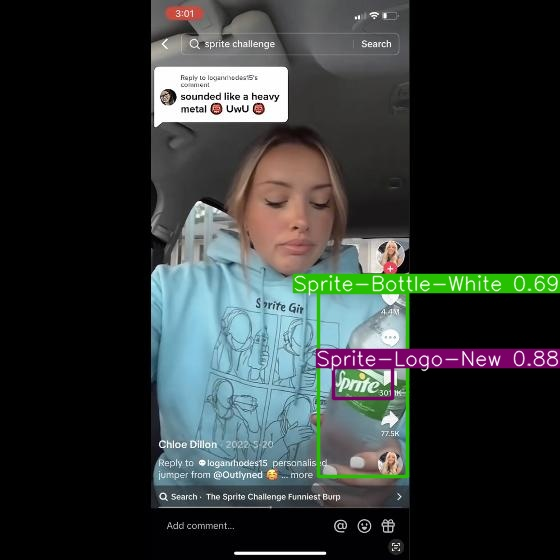

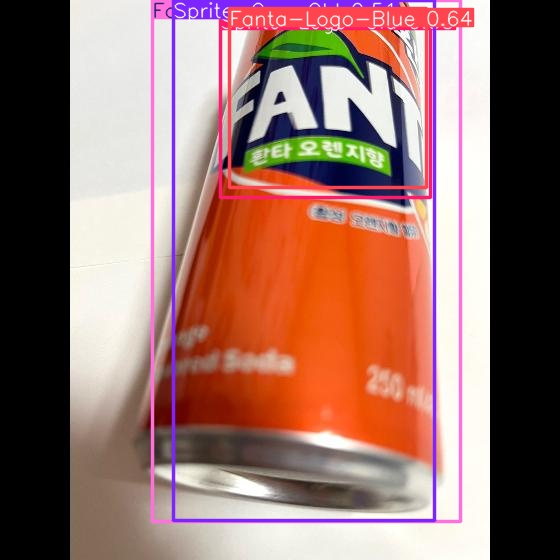

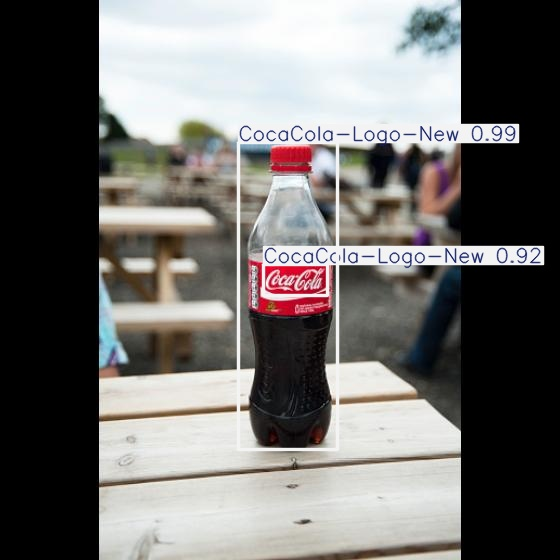

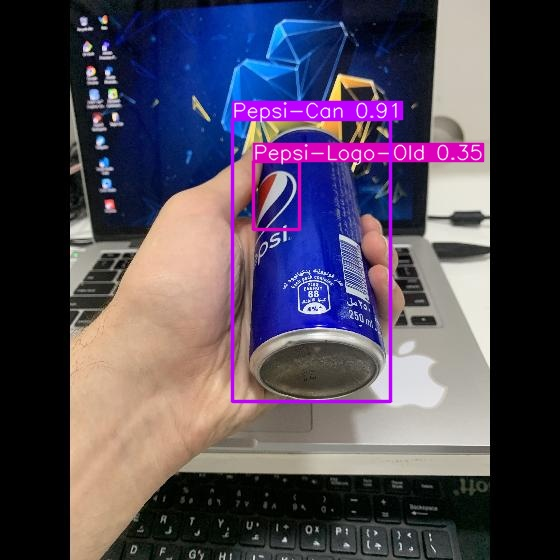

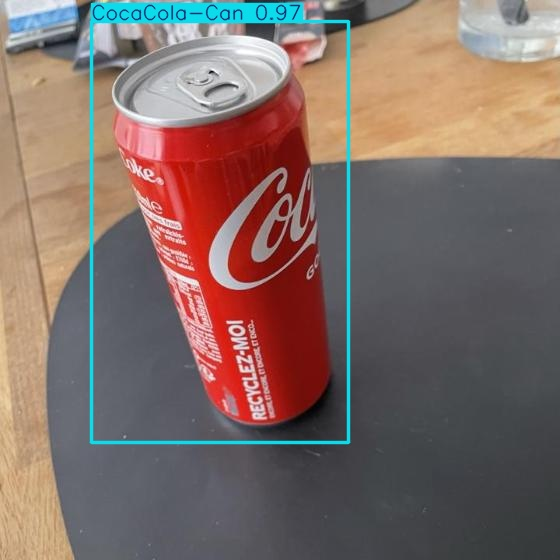

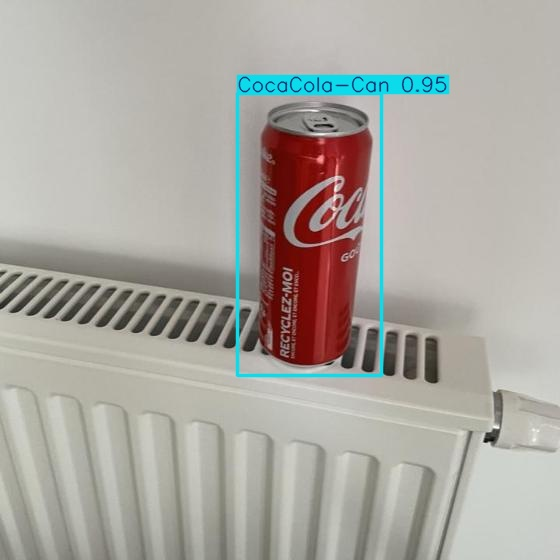

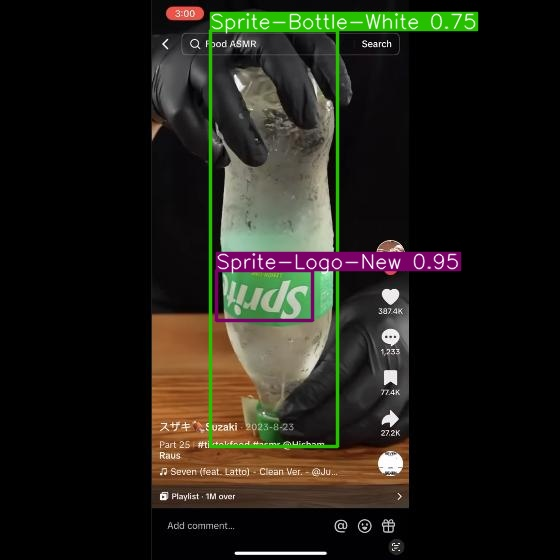

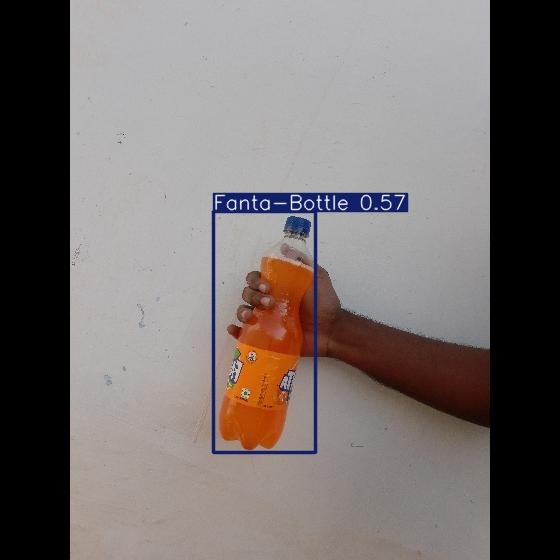

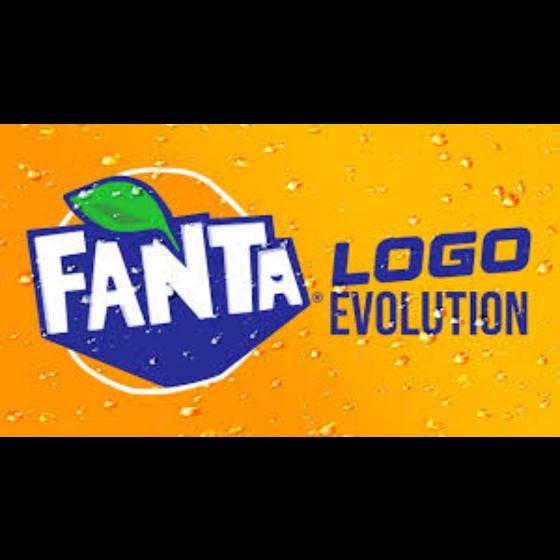

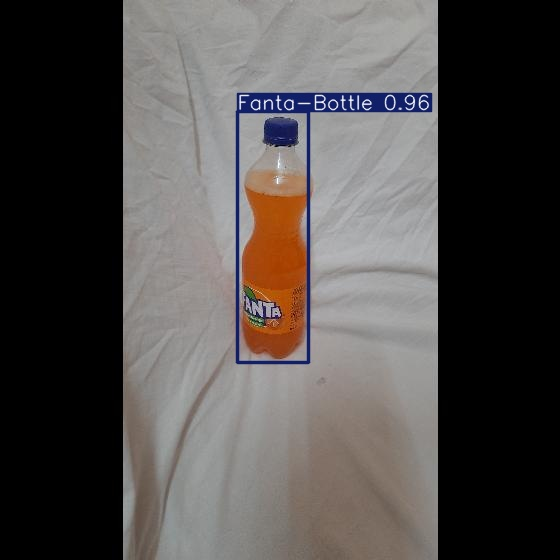

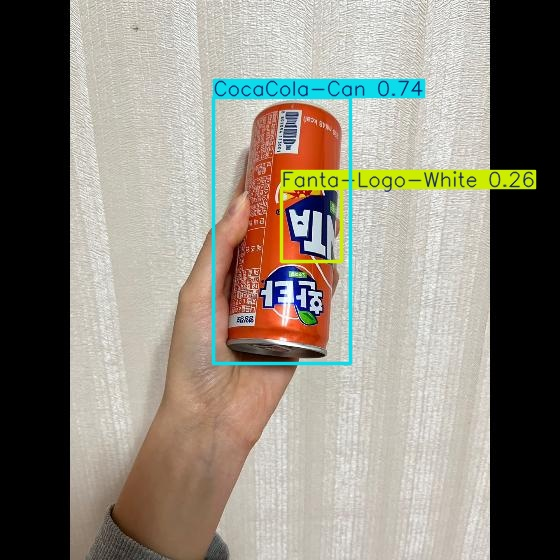

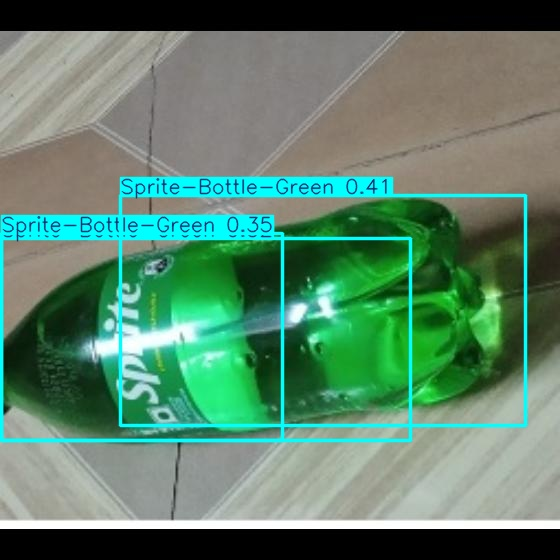

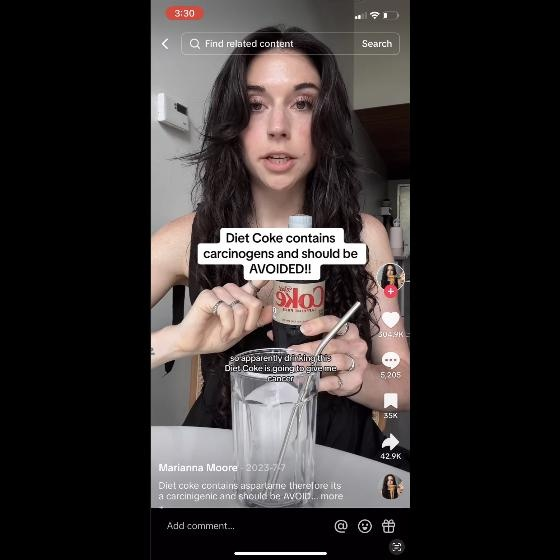

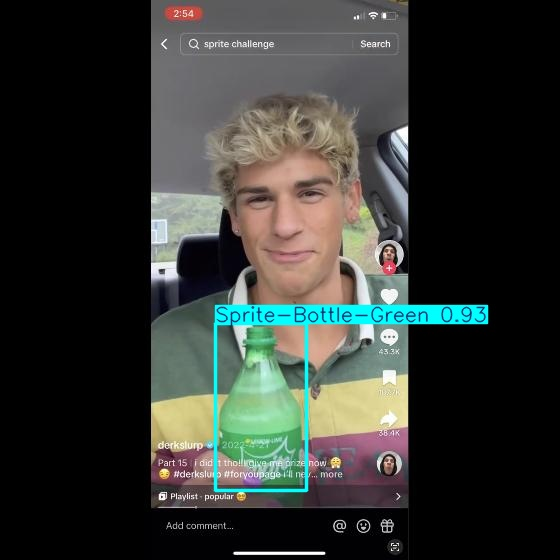

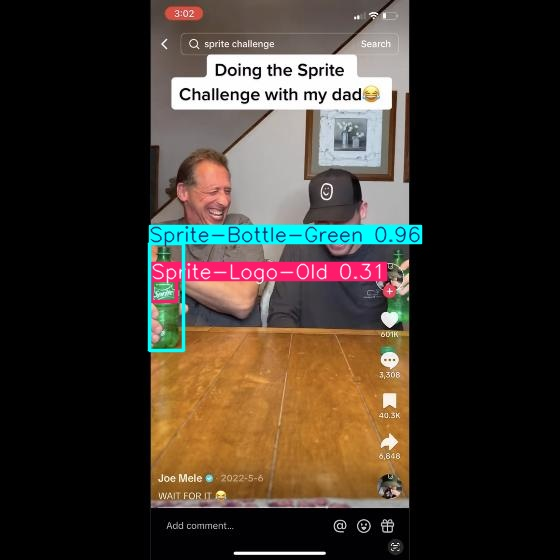

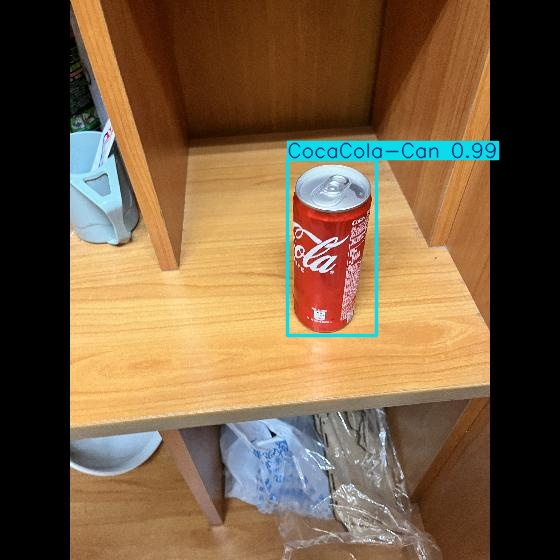

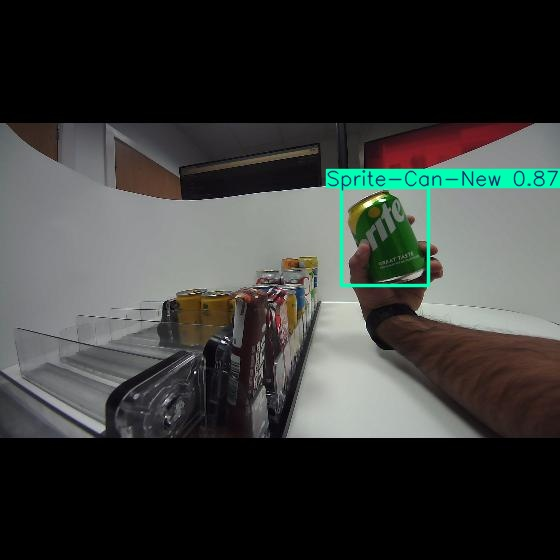

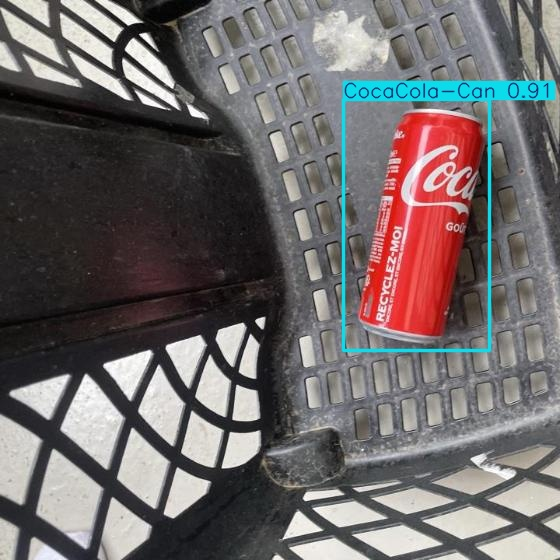

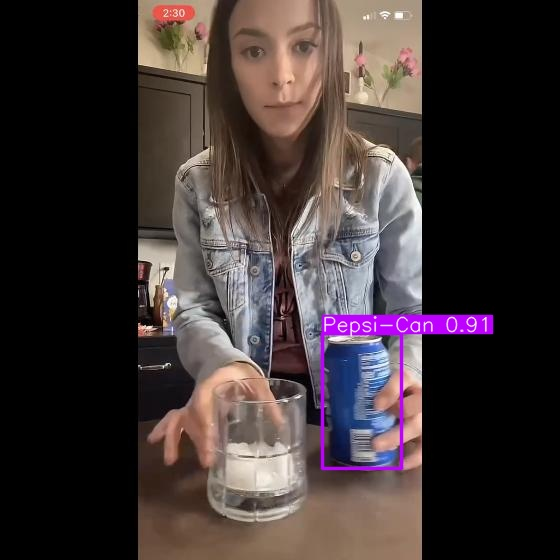

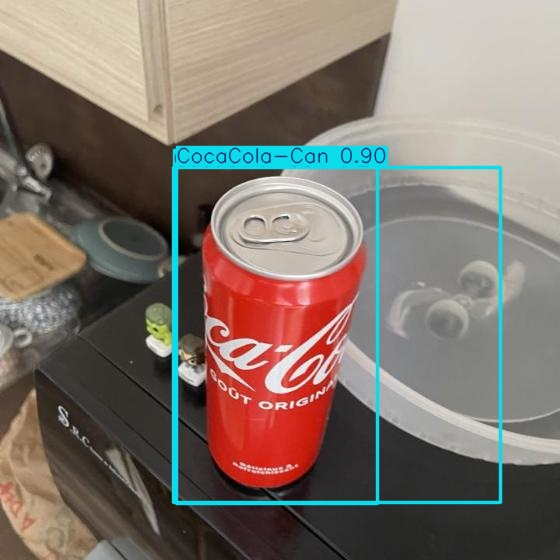

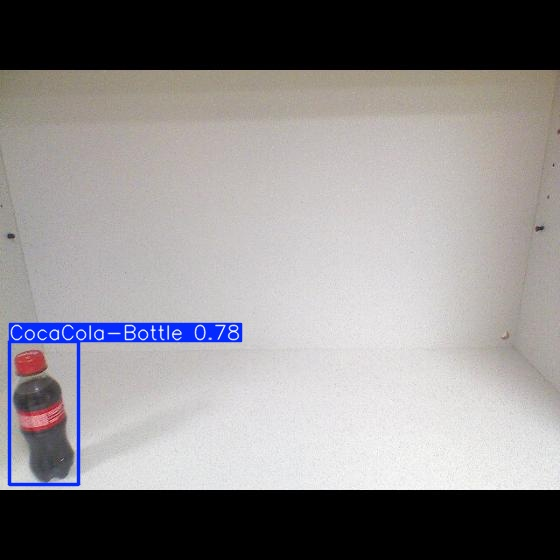

In [30]:
import glob
import os
!pip install IPython
import IPython
from IPython.display import Image as IPyImage, display
latest_folder = max(glob.glob('/content/runs/detect/predict3*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg'):
  display(IPyImage(filename=img, width = 600))
  print("\n")